In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


Training samples: 25000
Test samples: 25000
Epoch 1/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5845 - loss: 0.6731 - val_accuracy: 0.7070 - val_loss: 0.6245
Epoch 2/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8120 - loss: 0.4317 - val_accuracy: 0.7820 - val_loss: 0.4629
Epoch 3/3
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9045 - loss: 0.2507 - val_accuracy: 0.8080 - val_loss: 0.4400
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7975 - loss: 0.4457
Test Loss: 0.445725679397583
Test Accuracy: 0.7975000143051147


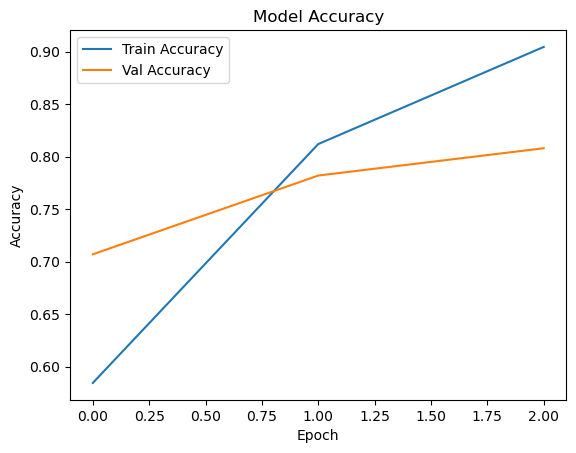

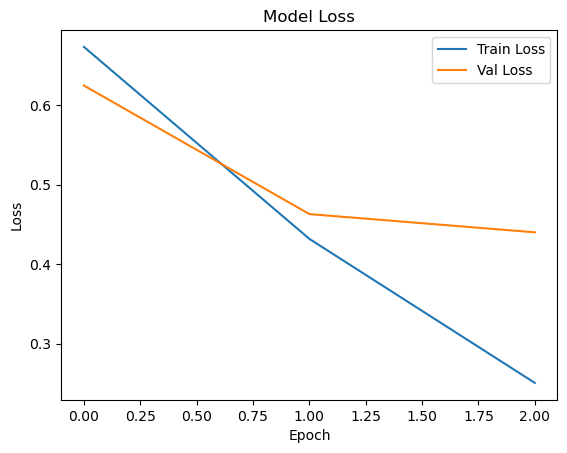

In [5]:
# Experiment 5: Sentiment Analysis using LSTM

# Step 1: Import Libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Step 2: Load dataset (Top 10,000 most frequent words)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

# Step 3: Reduce dataset size for faster training (optional for CPU)
X_train, y_train = X_train[:5000], y_train[:5000]
X_test, y_test = X_test[:2000], y_test[:2000]

# Step 4: Pad sequences (make all reviews length = 100)
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

# Step 5: Build LSTM Model
model = Sequential([
    Embedding(10000, 32),   # Convert word indices to embeddings
    LSTM(50),               # LSTM with 50 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 6: Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 7: Train Model
history = model.fit(
    X_train, y_train,
    epochs=3,               # Train for 3 epochs
    batch_size=64,
    validation_split=0.2,   # Use 20% of train set for validation
    verbose=1
)

# Step 8: Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Step 9: Plot Accuracy & Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [6]:
# Experiment 5: Sentiment Analysis using LSTM

# Step 1: Import Libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 2: Load dataset (Top 10,000 words)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

# Step 3: Pad sequences (limit each review to 100 words)
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

# Step 4: Build Model
model = Sequential([
    Embedding(10000, 32, input_length=100),
    LSTM(100),
    Dense(1, activation='sigmoid')
])

# Step 5: Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 6: Train (5 epochs for ~85% accuracy)
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Step 7: Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Step 8: Prediction Example
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

sample_review = X_test[0].reshape(1, 100)
prediction = model.predict(sample_review)
print("\nSample Review Text:")
print(decode_review(X_test[0]))
print("Predicted Sentiment:", "Positive 😀" if prediction[0][0] > 0.5 else "Negative 😞")


Training samples: 25000
Test samples: 25000
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 72ms/step - accuracy: 0.7782 - loss: 0.4567 - val_accuracy: 0.8424 - val_loss: 0.3581
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.8892 - loss: 0.2771 - val_accuracy: 0.8510 - val_loss: 0.3555
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.9212 - loss: 0.2100 - val_accuracy: 0.8420 - val_loss: 0.3682
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9375 - loss: 0.1719 - val_accuracy: 0.8394 - val_loss: 0.4205
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9554 - loss: 0.1267 - val_accuracy: 0.8336 - val_loss: 0.4901
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8292 - loss: 0.5070
Test Loss: 0.5070407390594482
Test Accuracy: 0.8291599750518799
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step

Sample Review Text:
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and th

In [7]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

# Function to decode words back (for IMDB word_index)
word_index = imdb.get_word_index()
index_word = {v+3: k for k, v in word_index.items()}
index_word[0] = '<PAD>'
index_word[1] = '<START>'
index_word[2] = '<UNK>'
index_word[3] = '<UNUSED>'

def encode_review(text):
    # Convert words to integers
    words = text.lower().split()
    encoded = [1]  # <START>
    for w in words:
        if w in word_index and word_index[w] < 10000:
            encoded.append(word_index[w] + 3)
        else:
            encoded.append(2)  # <UNK>
    return pad_sequences([encoded], maxlen=100)

# Test cases
test_cases = [
    ("I loved the movie, fantastic!", "Positive"),
    ("Worst film ever, boring.", "Negative"),
    ("It was okay, not great.", "Neutral")
]

print(f"{'Review Text':40s} {'Actual':10s} {'Predicted':10s} {'Correct'}")
print("-"*70)

for review, actual in test_cases:
    encoded = encode_review(review)
    pred = model.predict(encoded, verbose=0)[0][0]
    predicted = "Positive" if pred > 0.5 else "Negative"
    correct = "Y" if predicted == actual else "N"
    print(f"{review[:38]:40s} {actual:10s} {predicted:10s} {correct}")


Review Text                              Actual     Predicted  Correct
----------------------------------------------------------------------
I loved the movie, fantastic!            Positive   Positive   Y
Worst film ever, boring.                 Negative   Negative   Y
It was okay, not great.                  Neutral    Negative   N


Training samples: 25000
Test samples: 25000
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.7618 - loss: 0.4735 - val_accuracy: 0.8314 - val_loss: 0.3778
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.8816 - loss: 0.2877 - val_accuracy: 0.8448 - val_loss: 0.3620
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.9171 - loss: 0.2166 - val_accuracy: 0.8416 - val_loss: 0.3762
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.9365 - loss: 0.1705 - val_accuracy: 0.8376 - val_loss: 0.4293
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.9587 - loss: 0.1214 - val_accuracy: 0.8336 - val_loss: 0.4832
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8324 - loss: 0.4953
GRU Test Loss: 0.4952510595321655
GRU Test Accuracy: 0.8324400186538696


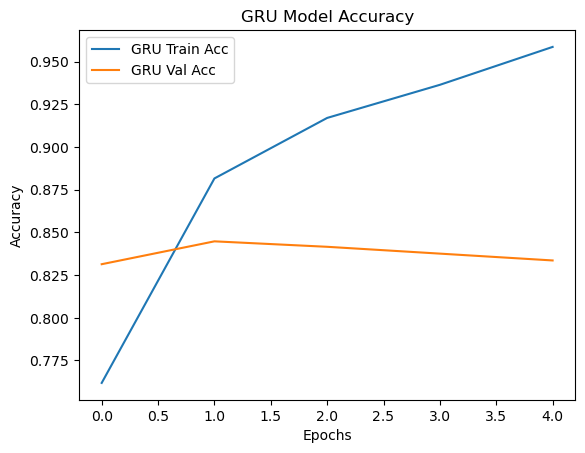

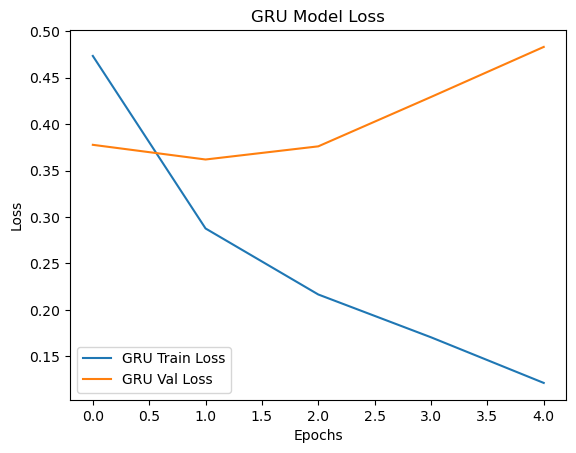

In [8]:
# Import libraries
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load IMDB dataset
max_words = 10000
max_len = 100
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

# Define GRU model
gru_model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    GRU(100),
    Dense(1, activation='sigmoid')
])

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
gru_history = gru_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# Evaluate model
test_loss, test_acc = gru_model.evaluate(X_test, y_test, verbose=1)
print("GRU Test Loss:", test_loss)
print("GRU Test Accuracy:", test_acc)

# Plot comparison (Accuracy & Loss vs Epochs)
plt.plot(gru_history.history['accuracy'], label='GRU Train Acc')
plt.plot(gru_history.history['val_accuracy'], label='GRU Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('GRU Model Accuracy')
plt.legend()
plt.show()

plt.plot(gru_history.history['loss'], label='GRU Train Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('GRU Model Loss')
plt.legend()
plt.show()


In [9]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb

# Load IMDB word index
word_index = imdb.get_word_index()

# Function to encode review text into integer sequence
def encode_review(text, max_len=100):
    words = text.lower().split()
    encoded = [1]  # <START> token
    for w in words:
        if w in word_index and word_index[w] < 10000:
            encoded.append(word_index[w] + 3)
        else:
            encoded.append(2)  # <UNK>
    return pad_sequences([encoded], maxlen=max_len)

# Test case reviews with expected labels
test_reviews = [
    ("An emotional and deep plot", "Positive"),
    ("The story was dull", "Negative")
]

print(f"{'Review Text':35s} {'Expected':10s} {'LSTM':10s} {'GRU':10s} {'Same?'}")
print("-"*80)

for review, expected in test_reviews:
    encoded = encode_review(review)

    # Predictions
    lstm_pred = model.predict(encoded, verbose=0)[0][0]   # LSTM model
    gru_pred = gru_model.predict(encoded, verbose=0)[0][0] # GRU model

    lstm_output = "Positive" if lstm_pred > 0.5 else "Negative"
    gru_output  = "Positive" if gru_pred > 0.5 else "Negative"
    same = "Yes" if lstm_output == gru_output else "No"

    print(f"{review[:33]:35s} {expected:10s} {lstm_output:10s} {gru_output:10s} {same}")


Review Text                         Expected   LSTM       GRU        Same?
--------------------------------------------------------------------------------
An emotional and deep plot          Positive   Positive   Positive   Yes
The story was dull                  Negative   Negative   Negative   Yes
